In [1]:
import pandas as pd
import numpy as np

# Quick look on data

In [2]:
medical = pd.read_csv("insurance.csv")

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
len(medical)

1338

In [5]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# There's no null in any column.
# Sex, smoker, region - categorial
# age, bmi, childern, charges - numerical

In [8]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
import matplotlib.pyplot as plt

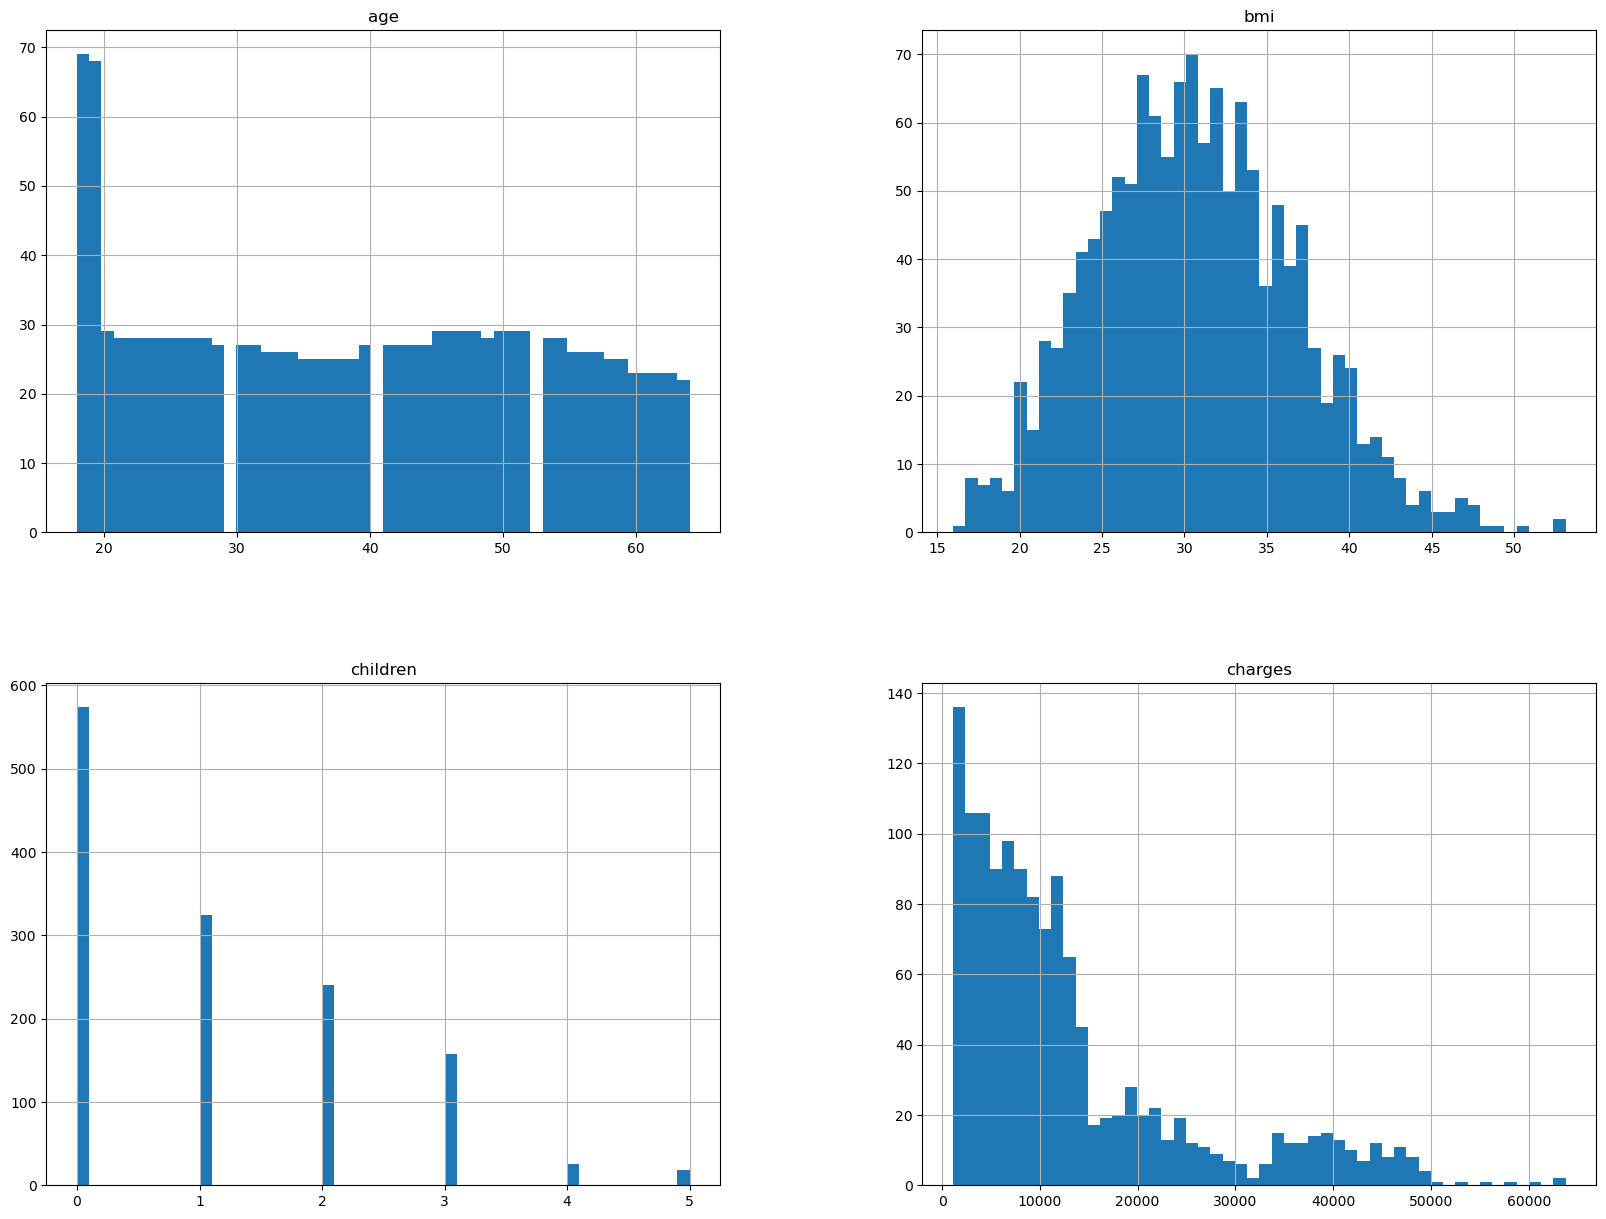

In [10]:
%matplotlib inline
medical.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
medical['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

<AxesSubplot:>

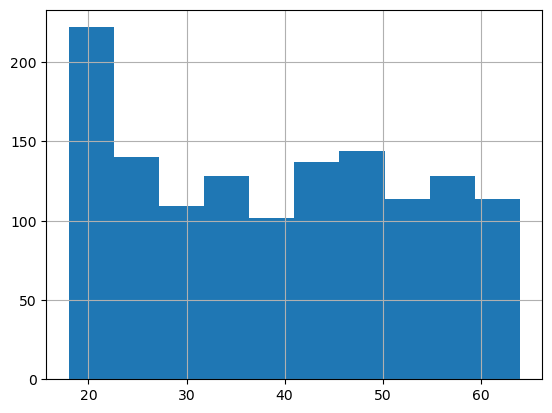

In [12]:
medical["age"].hist()

In [13]:
corr_matrix = medical.corr()

In [14]:
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

# Tran and test sets

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
X = medical.drop(['charges'],axis=1)
y = medical['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
X_train.head()

,age,sex,bmi,children,smoker,region
332,61,female,31.160,0,no,northwest
355,46,male,27.600,0,no,southwest
138,54,female,31.900,3,no,southeast
381,55,male,30.685,0,yes,northeast
292,25,male,45.540,2,yes,southeast


In [19]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [20]:
medical_num = X_train.drop(columns=['region', 'sex', 'smoker'])
medical_cat = X_train[['region', 'sex', 'smoker']]

In [21]:
num_attribs = list(medical_num)
cat_attribs = list(medical_cat)

In [22]:
num_pipeline = Pipeline([
    ('imputer',  SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [23]:
cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder())
])

In [24]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [25]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [26]:
len(X_train_prepared[0])

11

# 1. LinearRegression

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lin_reg = LinearRegression()

In [30]:
scores = []

In [31]:
lin_reg_score = cross_val_score(lin_reg, X_train_prepared, y_train, cv=3, verbose=3)
lin_reg_score.mean()
scores.append(["lin_reg", lin_reg_score.mean()])

[CV] END ................................ score: (test=0.780) total time=   0.0s
[CV] END ................................ score: (test=0.665) total time=   0.0s
[CV] END ................................ score: (test=0.750) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


# 2. RidgeRegression

In [32]:
from sklearn.linear_model import Ridge

In [33]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)

In [34]:
ridge_reg_score = cross_val_score(ridge_reg, X_train_prepared, y_train, cv=3, verbose=3)
scores.append(["ridge_reg", ridge_reg_score.mean()])

[CV] END ................................ score: (test=0.780) total time=   0.0s
[CV] END ................................ score: (test=0.666) total time=   0.0s
[CV] END ................................ score: (test=0.750) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [35]:
from sklearn.linear_model import SGDRegressor

In [36]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)

In [37]:
sgd_reg_score = cross_val_score(sgd_reg, X_train_prepared, y_train, cv=3, verbose=3)
scores.append(["sgd_reg", sgd_reg_score.mean()]) 

[CV] END ................................ score: (test=0.780) total time=   0.0s
[CV] END ................................ score: (test=0.665) total time=   0.0s
[CV] END ................................ score: (test=0.750) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


# 3. ElasticNet

In [38]:
from sklearn.linear_model import ElasticNet

In [39]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

In [40]:
elastic_net_score = cross_val_score(elastic_net, X_train_prepared, y_train, cv=3, verbose=3)
scores.append(["elastic_net", elastic_net_score.mean()]) 

[CV] END ................................ score: (test=0.758) total time=   0.0s
[CV] END ................................ score: (test=0.674) total time=   0.0s
[CV] END ................................ score: (test=0.734) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


# 4. LASSO

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso_reg = Lasso(alpha=0.1)

In [43]:
lasso_reg_score = cross_val_score(lasso_reg, X_train_prepared, y_train, cv=3, verbose=3)
scores.append(["lasso_reg_score", lasso_reg_score.mean()]) 

[CV] END ................................ score: (test=0.780) total time=   0.0s
[CV] END ................................ score: (test=0.665) total time=   0.0s
[CV] END ................................ score: (test=0.750) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


# Checking scores

In [44]:
scores.sort(key=lambda x: x[1], reverse=True)

In [45]:
scores

[['ridge_reg', 0.7318011803127212],
 ['lasso_reg_score', 0.7317367738021394],
 ['lin_reg', 0.7317356507067286],
 ['sgd_reg', 0.7316008612997676],
 ['elastic_net', 0.7220696188857966]]

# Final model #1 - RidgeRegression

In [46]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)

In [47]:
ridge_reg.fit(X_train_prepared, y_train)

Ridge(alpha=1, random_state=42, solver='cholesky')

In [48]:
ridge_reg_predictions = ridge_reg.predict(X_test_prepared)

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_predictions)
ridge_reg_rmse = np.sqrt(ridge_reg_mse)
ridge_reg_rmse

5813.470977730023